Q5.   
The attached dataset (grade5.csv) contains data on class size, average math and verbal test scores for 2,019 5th grade classes in 1,002 public schools in Israel, as well as enrollment in each school and percentage disadvantaged pupils. (Each school has one or more 5th grade classes.)  

In Israel, schools face a rule which states that classes cannot be larger than 40 pupils. When enrollment is 41, schools are supposed to open a second classroom, and then open a third classroom at 81 pupils etc. This causes discontinuous drops in class size at multiples of 40, while pupils are more or less evenly distributed between the multiple classes.


In [20]:
my_data = read.csv("hw2-5_grade.csv") 
# names(my_data)
drops <- c("X")
my_data=my_data[ , !(names(my_data) %in% drops)]
head(my_data)

schlcode,enrollment,classize,avgmath,avgverb,disadv
11005,54,28,74.11,70.5700,24
11005,54,26,71.11,75.0000,24
11006,37,22,64.00,75.4700,38
11006,37,15,50.00,60.6475,38
11009,32,32,68.38,73.9700,6
11010,68,34,59.86,69.5500,3


    schlcode       enrollment        classize        avgmath     
 Min.   :11005   Min.   :  8.00   Min.   : 8.00   Min.   :27.69  
 1st Qu.:31037   1st Qu.: 50.00   1st Qu.:26.00   1st Qu.:61.11  
 Median :41214   Median : 72.00   Median :31.00   Median :67.80  
 Mean   :39638   Mean   : 77.74   Mean   :29.94   Mean   :67.29  
 3rd Qu.:51206   3rd Qu.:100.00   3rd Qu.:35.00   3rd Qu.:74.09  
 Max.   :61365   Max.   :226.00   Max.   :44.00   Max.   :93.93  
                                                  NA's   :1      
    avgverb          disadv    
 Min.   :34.80   Min.   : 0.0  
 1st Qu.:69.86   1st Qu.: 4.0  
 Median :75.41   Median :10.0  
 Mean   :74.39   Mean   :14.1  
 3rd Qu.:79.84   3rd Qu.:19.5  
 Max.   :93.86   Max.   :76.0  
                               

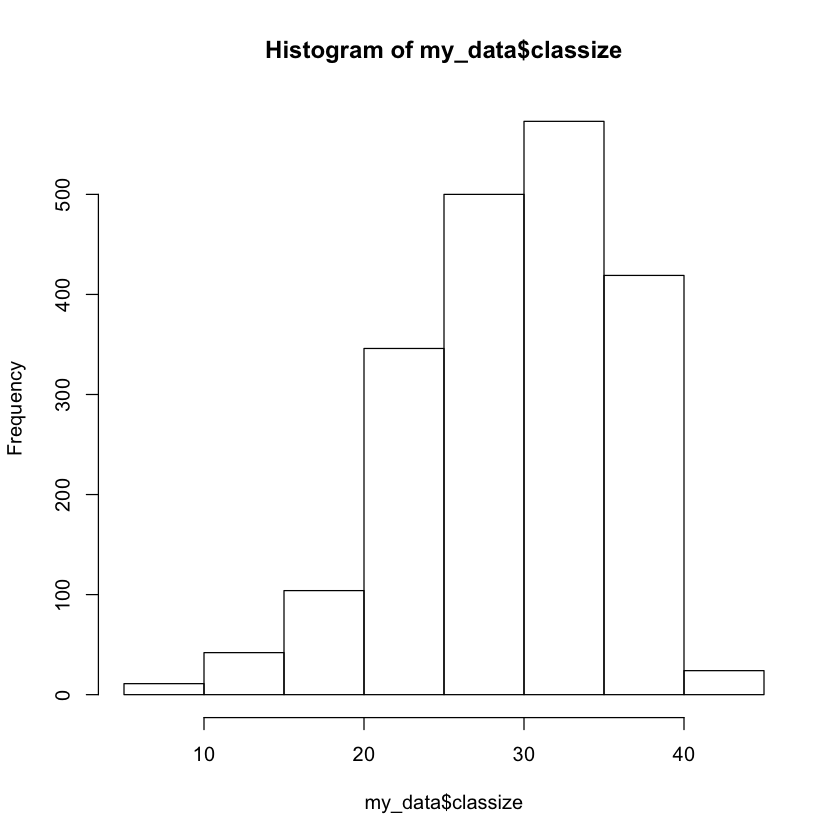

In [31]:
summary(my_data)
hist(my_data$classize)

# hist(my_data$enrollment)
# 40, 80, 120, 160, 200 (max 226)

In [33]:
head(my_data[my_data$classize>40,] )
# in fact we still have outliers of exceeding 40 (40-45)
summary(my_data[my_data$classize>40,] )

,schlcode,enrollment,classize,avgmath,avgverb,disadv
102,11170,67,43,74.25,85.19,2
105,11171,74,41,63.49,69.85,8
113,11184,81,41,74.71,78.89,5
252,21094,80,41,58.38,75.05,3
481,31022,134,41,65.05,79.44,7
819,41089,97,42,65.50,69.75,18


    schlcode       enrollment        classize       avgmath     
 Min.   :11170   Min.   : 36.00   Min.   :41.0   Min.   :53.74  
 1st Qu.:41089   1st Qu.: 73.75   1st Qu.:41.0   1st Qu.:63.64  
 Median :41442   Median : 81.50   Median :41.0   Median :68.34  
 Mean   :42455   Mean   : 86.67   Mean   :41.5   Mean   :69.89  
 3rd Qu.:51326   3rd Qu.:119.00   3rd Qu.:42.0   3rd Qu.:75.56  
 Max.   :61190   Max.   :134.00   Max.   :44.0   Max.   :85.91  
    avgverb          disadv     
 Min.   :58.03   Min.   : 0.00  
 1st Qu.:69.83   1st Qu.: 3.00  
 Median :77.47   Median : 7.00  
 Mean   :75.84   Mean   :10.42  
 3rd Qu.:81.96   3rd Qu.:13.50  
 Max.   :89.27   Max.   :44.00  

(a) Use OLS to regress math scores on class size without any controls and then again by adding the percentage of disadvantaged students in the class and school enrollment as controls. Interpret your results: what does this analysis suggest about the effect of class size on math scores?

In [4]:
lmodel1 <- lm(avgmath ~ classize, data = my_data)
summary(lmodel1)


Call:
lm(formula = avgmath ~ classize, data = my_data)

Residuals:
    Min      1Q  Median      3Q     Max 
-38.335  -6.041   0.357   6.579  27.584 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 57.66021    0.97703   59.02   <2e-16 ***
classize     0.32171    0.03188   10.09   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 9.367 on 2016 degrees of freedom
  (1 observation deleted due to missingness)
Multiple R-squared:  0.04808,	Adjusted R-squared:  0.04761 
F-statistic: 101.8 on 1 and 2016 DF,  p-value: < 2.2e-16


Interpretation:  
The bigger the class size is, the better the math scores will be.

In [5]:
lmodel2 <- lm(avgmath ~ classize+disadv, data = my_data)
summary(lmodel2)


Call:
lm(formula = avgmath ~ classize + disadv, data = my_data)

Residuals:
     Min       1Q   Median       3Q      Max 
-28.5963  -5.6205   0.1853   5.9938  29.6261 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 69.81244    1.01492  68.786   <2e-16 ***
classize     0.07583    0.03027   2.505   0.0123 *  
disadv      -0.33953    0.01467 -23.148   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 8.327 on 2015 degrees of freedom
  (1 observation deleted due to missingness)
Multiple R-squared:  0.248,	Adjusted R-squared:  0.2473 
F-statistic: 332.3 on 2 and 2015 DF,  p-value: < 2.2e-16


Interpretation:  
The bigger the class size is, the better the math scores will be. The higher the disadvantage student percentage is, the worse the scores will be.

In [7]:
lmodel3 <- lm(avgmath ~ classize+disadv+enrollment, data = my_data)
summary(lmodel3)


Call:
lm(formula = avgmath ~ classize + disadv + enrollment, data = my_data)

Residuals:
     Min       1Q   Median       3Q      Max 
-28.4094  -5.5894   0.1003   5.9490  29.7707 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 70.085372   1.018056  68.842  < 2e-16 ***
classize     0.018535   0.036646   0.506  0.61306    
disadv      -0.331671   0.014917 -22.234  < 2e-16 ***
enrollment   0.017121   0.006196   2.763  0.00578 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 8.313 on 2014 degrees of freedom
  (1 observation deleted due to missingness)
Multiple R-squared:  0.2509,	Adjusted R-squared:  0.2498 
F-statistic: 224.8 on 3 and 2014 DF,  p-value: < 2.2e-16


**Interpretation: ** 
After adding disadv and enrollment as controls, we see that he classsize is not longer a significant factor influcing maths scores. Here we may guess, the different in maths scores were caused by different covariates, which means that the effect of class size "being a significant factor" as we saw before might have only been caused by factors other than class size ifself.

(b) Limit the sample to schools with enrollments between 20 and 60 students. Explain how one could use a regression discontinuity to assess the effect of class size on math scores. Discuss the validity of the design.

- Enrollment as **instrumental variables**.
- Classsize as **treatment**.
- Scors as the **effect** to be analyzed.  
Discontinuity occurs around enrollment at multiples of 40 but we still have **overlap** around the cutoff - classize being 40-43 around the cut-off, so that the design is valid.

,schlcode,enrollment,classize,avgmath,avgverb,disadv
1,11005,54,28,74.11,70.5700,24
2,11005,54,26,71.11,75.0000,24
3,11006,37,22,64.00,75.4700,38
4,11006,37,15,50.00,60.6475,38
5,11009,32,32,68.38,73.9700,6
19,11021,58,30,57.86,72.6400,11


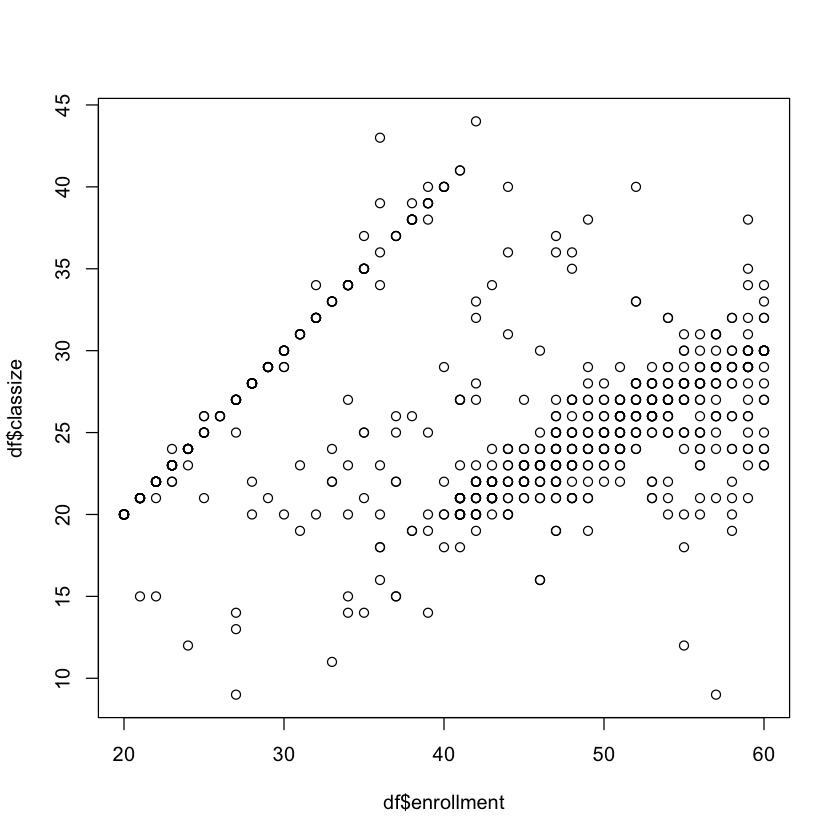

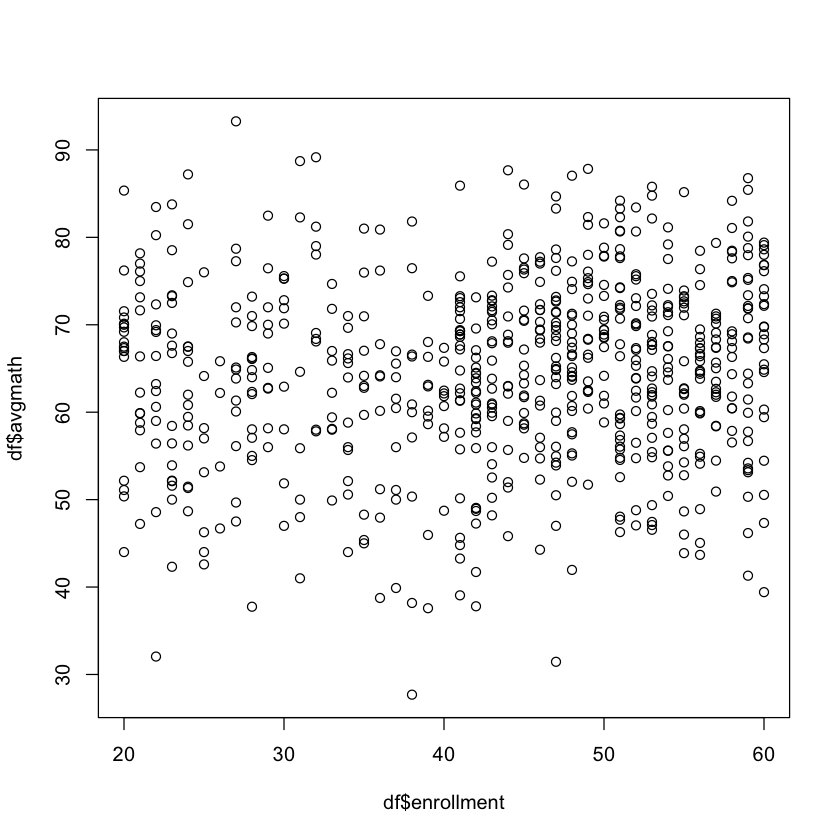

In [36]:
df<-my_data[my_data$enrollment>=20 & my_data$enrollment<=60,]
head(df)
# summary(df)
# hist(df$classize)
plot(df$enrollment,df$classize)
plot(df$enrollment,df$avgmath)

(c) Use a sharp RDD with OLS to estimate the effect of being in a large class on math scores. Now do the same but also control for the percentage of disadvantaged students in the class. Report confidence intervals, interpret your results, compare to the first part, and explain any differences.




In [ ]:
data<-copy(df)
data$cut=df$class


(d) Now use local linear regression (loess in R) and use bootstrap for confidence intervals. Assess the validity of this model vs linear and interpret the results.


(e) Repeat the last two steps using a fuzzy RDD. Discuss the relevance of sharp vs fuzzy in this dataset as well as the defensibility of the assumptions needed of either RDD to be valid in this dataset.


For fuzzy RDD, we do wald estimator: 
- Enrollment as **instrumental variables**.
- Classsize as **treatment**.
- Scors as the **effect** to be analyzed.  
Discontinuity occurs around enrollment at multiples of 40 but we still have **overlap** around the cutoff - classize being 40-43 around the cut-off, so that the design is valid.